A model with real unknowns has been initialized
A disk of radius 0.6 surrounded by an annulus of radii 0.6 and 1.0 has been meshed
Domain has been set
Domain is set and contains 1 mesh(es):
=== on mesh 0 of dim 2
* Subdomains are: {'Omega_Disk': 1, 'Omega_Annulus': 2}
* Boundaries are: {'Interface': 10, 'Gamma': 20}
domain: Concentric has been set
state: T has been added
port: T has been added on region 1
costate: T has been added to state: T
state: T has new costate: T
FEM_PK(2,2) has been set for port T
port: Heat flux has been added on region 1
FEM_PK(2,1) has been set for port Heat flux
port: Interface Heat has been added on region 10
FEM_PK(2,1) has been set for port Interface Heat
state: p has been added
port: p has been added on region 2
costate: p has been added to state: p
state: p has new costate: p
FEM_PK(2,1) has been set for port p
state: q has been added
port: q has been added on region 2
costate: q has been added to state: q
state: q has new costate: q
FEM_PK(2,2) has be

message from gf_mesh_get follow:
gfMesh object in dimension 2 with 451 points and 835 elements

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 1734 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 900 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 450 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 450 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 3468 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 450 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 450 degrees of freedom

Parameter rho

Perform initialisation using 1 step(s) of a pseudo scheme, with timestep 0.0001, for initial value consistency
Initialisation done in 0.03642s


i=       0 t=       0 * (0s)   dt=    0.01        
i=      11 t=0.0103459 * (0s)   dt=0.00208844           
i=      16 t=0.023104 * (0s)   dt=0.00315945         
i=      20 t=0.0362174 * (0s)   dt=0.00357894        
i=      23 t=0.046782 * (0s)   dt=0.00328135         
i=      27 t=0.0591471 * (0s)   dt=0.00281238        
i=      31 t=0.0707924 * (0s)   dt=0.00303554        
i=      35 t=0.0835341 * (1s)   dt=0.00344117        
i=      39 t=0.0966414 * (1s)   dt=0.00315681        
i=      43 t= 0.10949 * (1s)   dt=0.00334407         
i=      46 t=0.119648 * (1s)   dt=0.00338025        
i=      49 t=0.129656 * (1s)   dt=0.00351756        
i=      52 t=0.140409 * (1s)   dt=0.0034907         
i=      56 t=0.153353 * (1s)   dt=0.00282798        
i=      60 t=0.165068 * (1s)   dt=0.00319301        
i=      64 t=0.177594 * (1s)   dt=0.00319802        
i=      68 t=0.190863 * (1s)   dt=0.00326203        
i=      72 t=0.203035 * (1s)   dt=0.00302607        
i=      76 t=0.215458 * (2s)   dt=0.

Elapsed time: 15.79s
Steps: 641 (2 rejected, 0 Nonlinear solver failures)
Nonlinear iterations: 646, Linear iterations: 646
Start computing the Hamiltonian
Hamiltonian has been computed in 0.4407696556299925 s
Start computing the powers (substituted ports are not automated)
Power cannot be computed for dynamic or substituted port T
Power cannot be computed for dynamic or substituted port Heat flux
Start computing the power flowing through Interface Heat
Power in Interface Heat has been computed in 0.02162693627178669 s
Power cannot be computed for dynamic or substituted port p
Power cannot be computed for dynamic or substituted port q
Start computing the power flowing through Interface Wave
Power in Interface Wave has been computed in 0.021260293200612068 s
Start computing the power flowing through Boundary Wave
Power in Boundary Wave has been computed in 0.019196055829524994 s
Powers have been computed in 0.06604491919279099 s


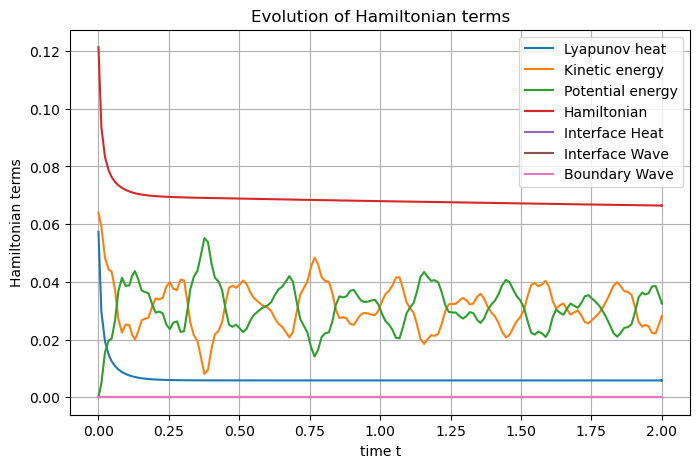

In [1]:
import scrimp as S

hw = S.DPHS("real")

hw.set_domain(S.Domain("Concentric", {"R": 1., "r": 0.6, "h": 0.1}))

T = S.State("T", "Temperature", "scalar-field", region=1)
hw.add_state(T)
hw.add_costate(S.CoState("T", "Temperature", T, substituted=True))
V_T = S.FEM("T", 2)
hw.add_FEM(V_T)

Flux_Q = S.Port("Heat flux", "f_Q", "e_Q", "vector-field", dissipative=True, substituted=True, region=1)
hw.add_port(Flux_Q)
V_Q = S.FEM("Heat flux", 1)
hw.add_FEM(V_Q)

hw.add_control_port(S.Control_Port("Interface Heat", "U_T", "Heat flux", 
                                   "Y_T", "Temperature", "scalar-field", 
                                   region=10, position="effort"))
V_int_T = S.FEM("Interface Heat", 1)
hw.add_FEM(V_int_T)

p = S.State("p", "Velocity", "scalar-field", region=2)
hw.add_state(p)
hw.add_costate(S.CoState("p", "Velocity", p, substituted=True))
V_p = S.FEM("p", 1)
hw.add_FEM(V_p)

q = S.State("q", "Stress", "vector-field", region=2)
hw.add_state(q)
hw.add_costate(S.CoState("q", "Stress", q, substituted=True))
V_q = S.FEM("q", 2)
hw.add_FEM(V_q)

hw.add_control_port(S.Control_Port("Interface Wave", "U_w", "Velocity", 
                                   "Y_w", "Velocity", "scalar-field", 
                                   region=10, position="effort"))
V_int_w = S.FEM("Interface Wave", 1)
hw.add_FEM(V_int_w)

hw.add_control_port(S.Control_Port("Boundary Wave", "U_w_bnd", "Velocity", 
                                   "Y_w_bnd", "Velocity", "scalar-field", 
                                   region=20, position="flow"))
V_bnd_w = S.FEM("Boundary Wave", 1)
hw.add_FEM(V_bnd_w)

hw.add_parameter(S.Parameter("rho_CV", "Mass density times heat capacity", "scalar-field", "1.", "T"))
hw.add_parameter(S.Parameter("Lambda_inv", "Heat conductivity", "tensor-field", "[[1., 0.],[0., 1.]]", "Heat flux"))

hw.add_parameter(S.Parameter("rho", "Mass density", "scalar-field", "1.", "p"))
hw.add_parameter(S.Parameter("Kappa_inv", "Young\"s modulus", "tensor-field", "[[1., 0.],[0., 1.]]", "q"))

# === Heat grad-grad

hw.add_brick(S.Brick("M_T", "T*rho_CV*Test_T", [1], dt=True, position="flow"))
hw.add_brick(S.Brick("M_Q", "f_Q.Lambda_inv.Test_f_Q", [1], position="flow"))

hw.add_brick(S.Brick("M_Y_T", "Y_T*Test_Y_T", [10], position="flow"))

hw.add_brick(S.Brick("D_T", "f_Q.Grad(Test_T)", [1], position="effort"))
hw.add_brick(S.Brick("B_T", "-U_T*Test_T", [10], position="effort"))

hw.add_brick(S.Brick("-D_T^T", "-Grad(T).Test_f_Q", [1], position="effort"))

hw.add_brick(S.Brick("-B_T^T", "T*Test_Y_T", [10], position="effort"))

# === Wave div-div

hw.add_brick(S.Brick("M_p", "p*rho*Test_p", [2], dt=True, position="flow"))
hw.add_brick(S.Brick("M_q", "q.Kappa_inv.Test_q", [2], dt=True, position="flow"))

hw.add_brick(S.Brick("M_Y_w", "Y_w*Test_Y_w", [10], position="flow"))
hw.add_brick(S.Brick("M_Y_w_bnd", "U_w_bnd*Test_Y_w_bnd", [20], position="flow"))

hw.add_brick(S.Brick("D_w", "Div(q)*Test_p", [2], position="effort"))

hw.add_brick(S.Brick("-D_w^T", "-p*Div(Test_q)", [2], position="effort"))
hw.add_brick(S.Brick("B_w", "-U_w*Test_q.Normal", [10], position="effort"))
hw.add_brick(S.Brick("B_w_bnd", "-Y_w_bnd*Test_q.Normal", [20], position="effort"))

hw.add_brick(S.Brick("-B_w^T", "q.Normal*Test_Y_w", [10], position="effort"))
hw.add_brick(S.Brick("-B_w_bnd^T", "q.Normal*Test_Y_w_bnd", [20], position="effort"))

# === Gyrator

hw.set_control("Interface Heat", "Y_w") # Care must be taken, the Normal vector has an opposite sign
hw.set_control("Interface Wave", "Y_T")
hw.set_control("Boundary Wave", "0.")

hw.set_initial_value("T", "2.*np.exp(-25*((x-0.6)*(x-0.6)+y*y))")
hw.set_initial_value("p", "2.*np.exp(-25*((x-0.6)*(x-0.6)+y*y))")
hw.set_initial_value("q", "[0.,0.]")

hw.set_time_scheme(t_0=0., t_f=2., dt=0.01)

hw.solve()

hw.hamiltonian.add_term(S.Term("Lyapunov heat", "0.5*rho_CV*T*T", [1]))
hw.hamiltonian.add_term(S.Term("Kinetic energy", "0.5*rho*p*p", [2]))
hw.hamiltonian.add_term(S.Term("Potential energy", "0.5*q.Kappa_inv.q", [2]))

hw.plot_Hamiltonian()
